# **NEURAL NETWORKS – PERCEPTRON MODEL IMPLEMENTATION**

 x1  x2  label
  2   1      0
  3   2      0
  4   1      0
  5   2      0
  6   3      0
  1   5      1
  2   6      1
  3   5      1
  4   6      1
  5   5      1

FINAL WEIGHTS: [-0.3  0.5]
FINAL BIAS: -0.2
MODEL ACCURACY: 1.0

CONFUSION MATRIX

[[5 0]
 [0 5]]


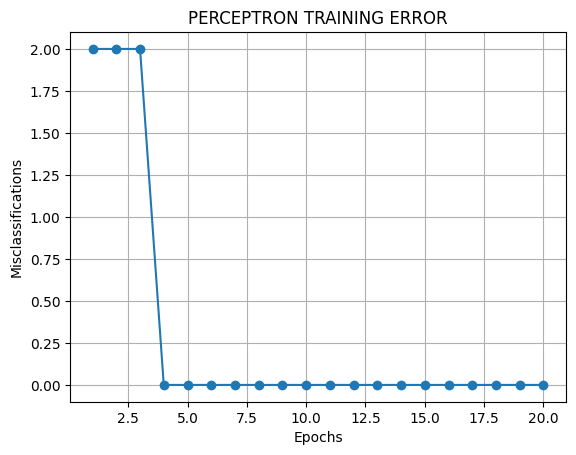

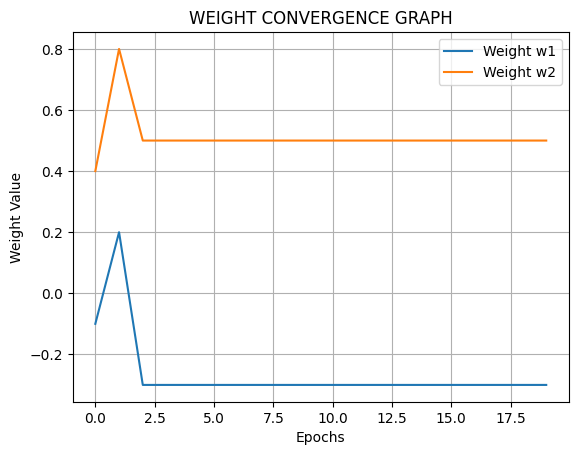

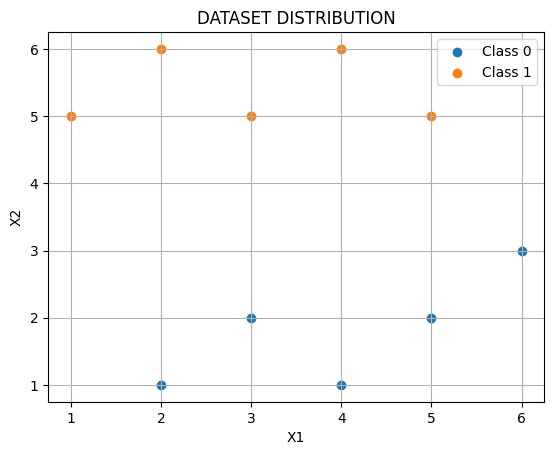

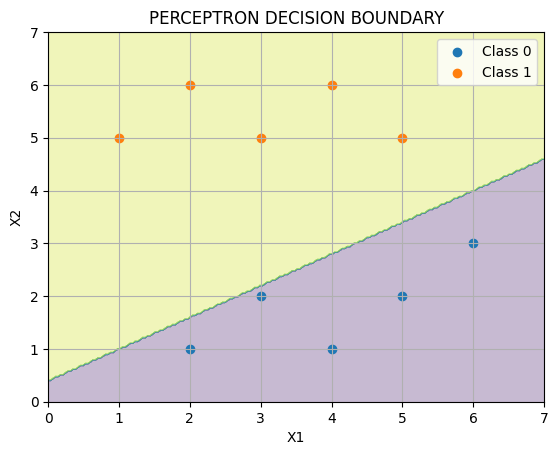

In [4]:
# NEURAL NETWORKS – PERCEPTRON MODEL
# GOOGLE COLAB IMPLEMENTATION
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

# LOAD DATASET
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML(extra)/Neural Network/perceptron_data.csv")

X = data[['x1', 'x2']].values
y = data['label'].values

# ASCII DATASET VIEW
print(data.to_string(index=False))

# PERCEPTRON CLASS
class Perceptron:
    def __init__(self, learning_rate=0.1, epochs=20):
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        self.errors = []
        self.weight_history = []

        for epoch in range(self.epochs):
            total_error = 0
            for xi, target in zip(X, y):
                prediction = self.predict(xi)
                update = self.lr * (target - prediction)
                self.weights += update * xi
                self.bias += update
                total_error += int(update != 0.0)
            self.errors.append(total_error)
            self.weight_history.append(self.weights.copy())

    def net_input(self, X):
        return np.dot(X, self.weights) + self.bias

    def predict(self, X):
        return np.where(self.net_input(X) >= 0, 1, 0)

# TRAIN MODEL
model = Perceptron(learning_rate=0.1, epochs=20)
model.fit(X, y)

# PREDICTIONS AND ACCURACY
y_pred = model.predict(X)
accuracy = accuracy_score(y, y_pred)

print("\nFINAL WEIGHTS:", model.weights)
print("FINAL BIAS:", model.bias)
print("MODEL ACCURACY:", accuracy)

# CONFUSION MATRIX (ASCII)
cm = confusion_matrix(y, y_pred)
print("\nCONFUSION MATRIX\n")
print(cm)

# PLOT 1: TRAINING ERRORS
plt.figure()
plt.plot(range(1, len(model.errors) + 1), model.errors, marker='o')
plt.xlabel("Epochs")
plt.ylabel("Misclassifications")
plt.title("PERCEPTRON TRAINING ERROR")
plt.grid(True)
plt.show()

# PLOT 2: WEIGHT CONVERGENCE
weights = np.array(model.weight_history)

plt.figure()
plt.plot(weights[:, 0], label="Weight w1")
plt.plot(weights[:, 1], label="Weight w2")
plt.xlabel("Epochs")
plt.ylabel("Weight Value")
plt.title("WEIGHT CONVERGENCE GRAPH")
plt.legend()
plt.grid(True)
plt.show()

# PLOT 3: DATA DISTRIBUTION
plt.figure()
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Class 0")
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Class 1")
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("DATASET DISTRIBUTION")
plt.legend()
plt.grid(True)
plt.show()

# PLOT 4: DECISION BOUNDARY
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Class 0")
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Class 1")
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("PERCEPTRON DECISION BOUNDARY")
plt.legend()
plt.grid(True)
plt.show()
